In [1]:
from Networks import *

Function Description:
1. plotRandomCommunity(G, community, title = None)
2. get_community_dict(communities)
3. get_communities(community_dict)
4. edge_betweenness_sparsification(G, k)
5. run_louvain(G)
6. metrics(ground_truth, predicted)
7. plot_metrics_sparse(G, ground_truth, sparseFunctions, k_values)



ORIGINAL GRAPH: G_DBLP, INDUCED SUBGRAPH: G_ind_DBLP, COMMUNITIES: communitiesDBLP
Number of nodes:  317080
Number of edges:  1049866
Number of communities:  150
Number of nodes in induced subgraph:  1420
Number of edges in induced subgraph:  4609

ORIGINAL GRAPH: G_Amz, INDUCED SUBGRAPH: G_ind_Amz, COMMUNITIES: communitiesAmazon
Number of nodes:  334863
Number of edges:  925872
Number of communities:  300
Number of nodes in induced subgraph:  2008
Number of edges in induced subgraph:  5960

ORIGINAL GRAPH: G_YT, INDUCED SUBGRAPH: G_ind_YT, COMMUNITIES: communitiesYT
Number of nodes:  1134890
Number of edges:  2987624
Number of communities:  100
Number of nodes in induced subgraph:  

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

# **DBLP**

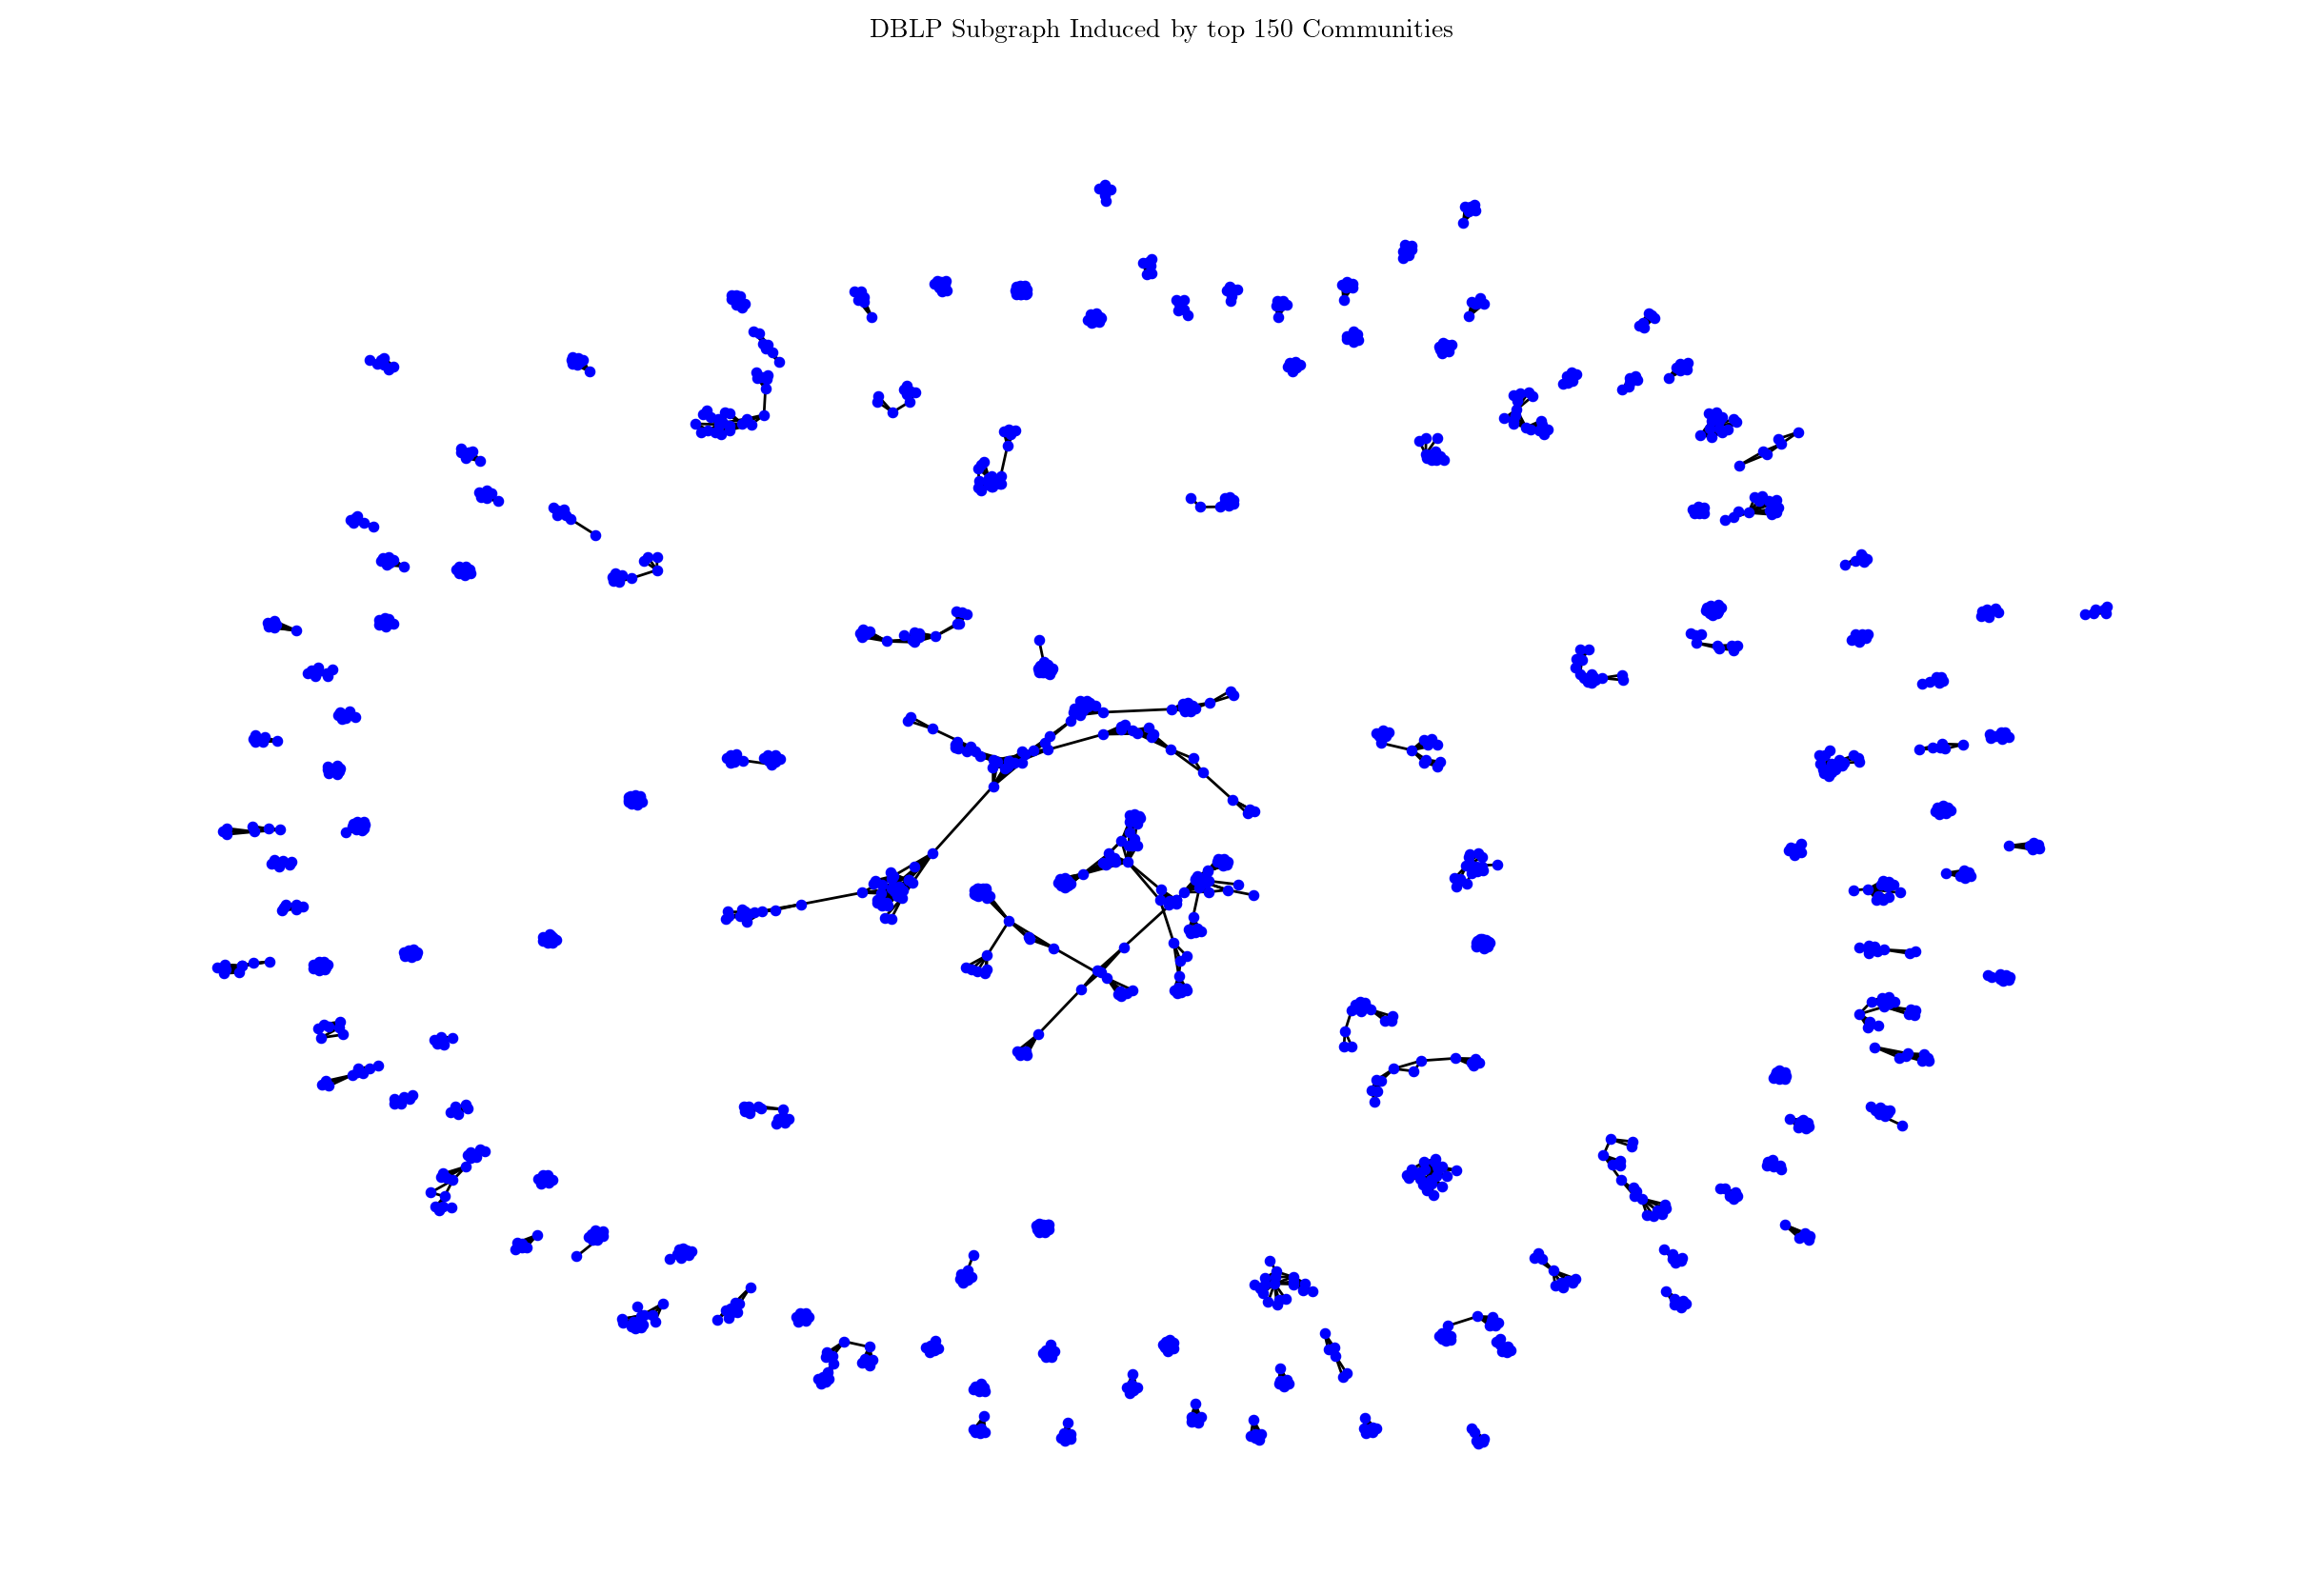

In [5]:
plt.figure(figsize = (12, 8))
nx.draw(G_ind_DBLP, with_labels = False, node_size = 10, node_color = "blue", edge_color = "black", pos = nx.spring_layout(G_ind_DBLP, scale = 4))
plt.title("DBLP Subgraph Induced by top 150 Communities")
plt.show()

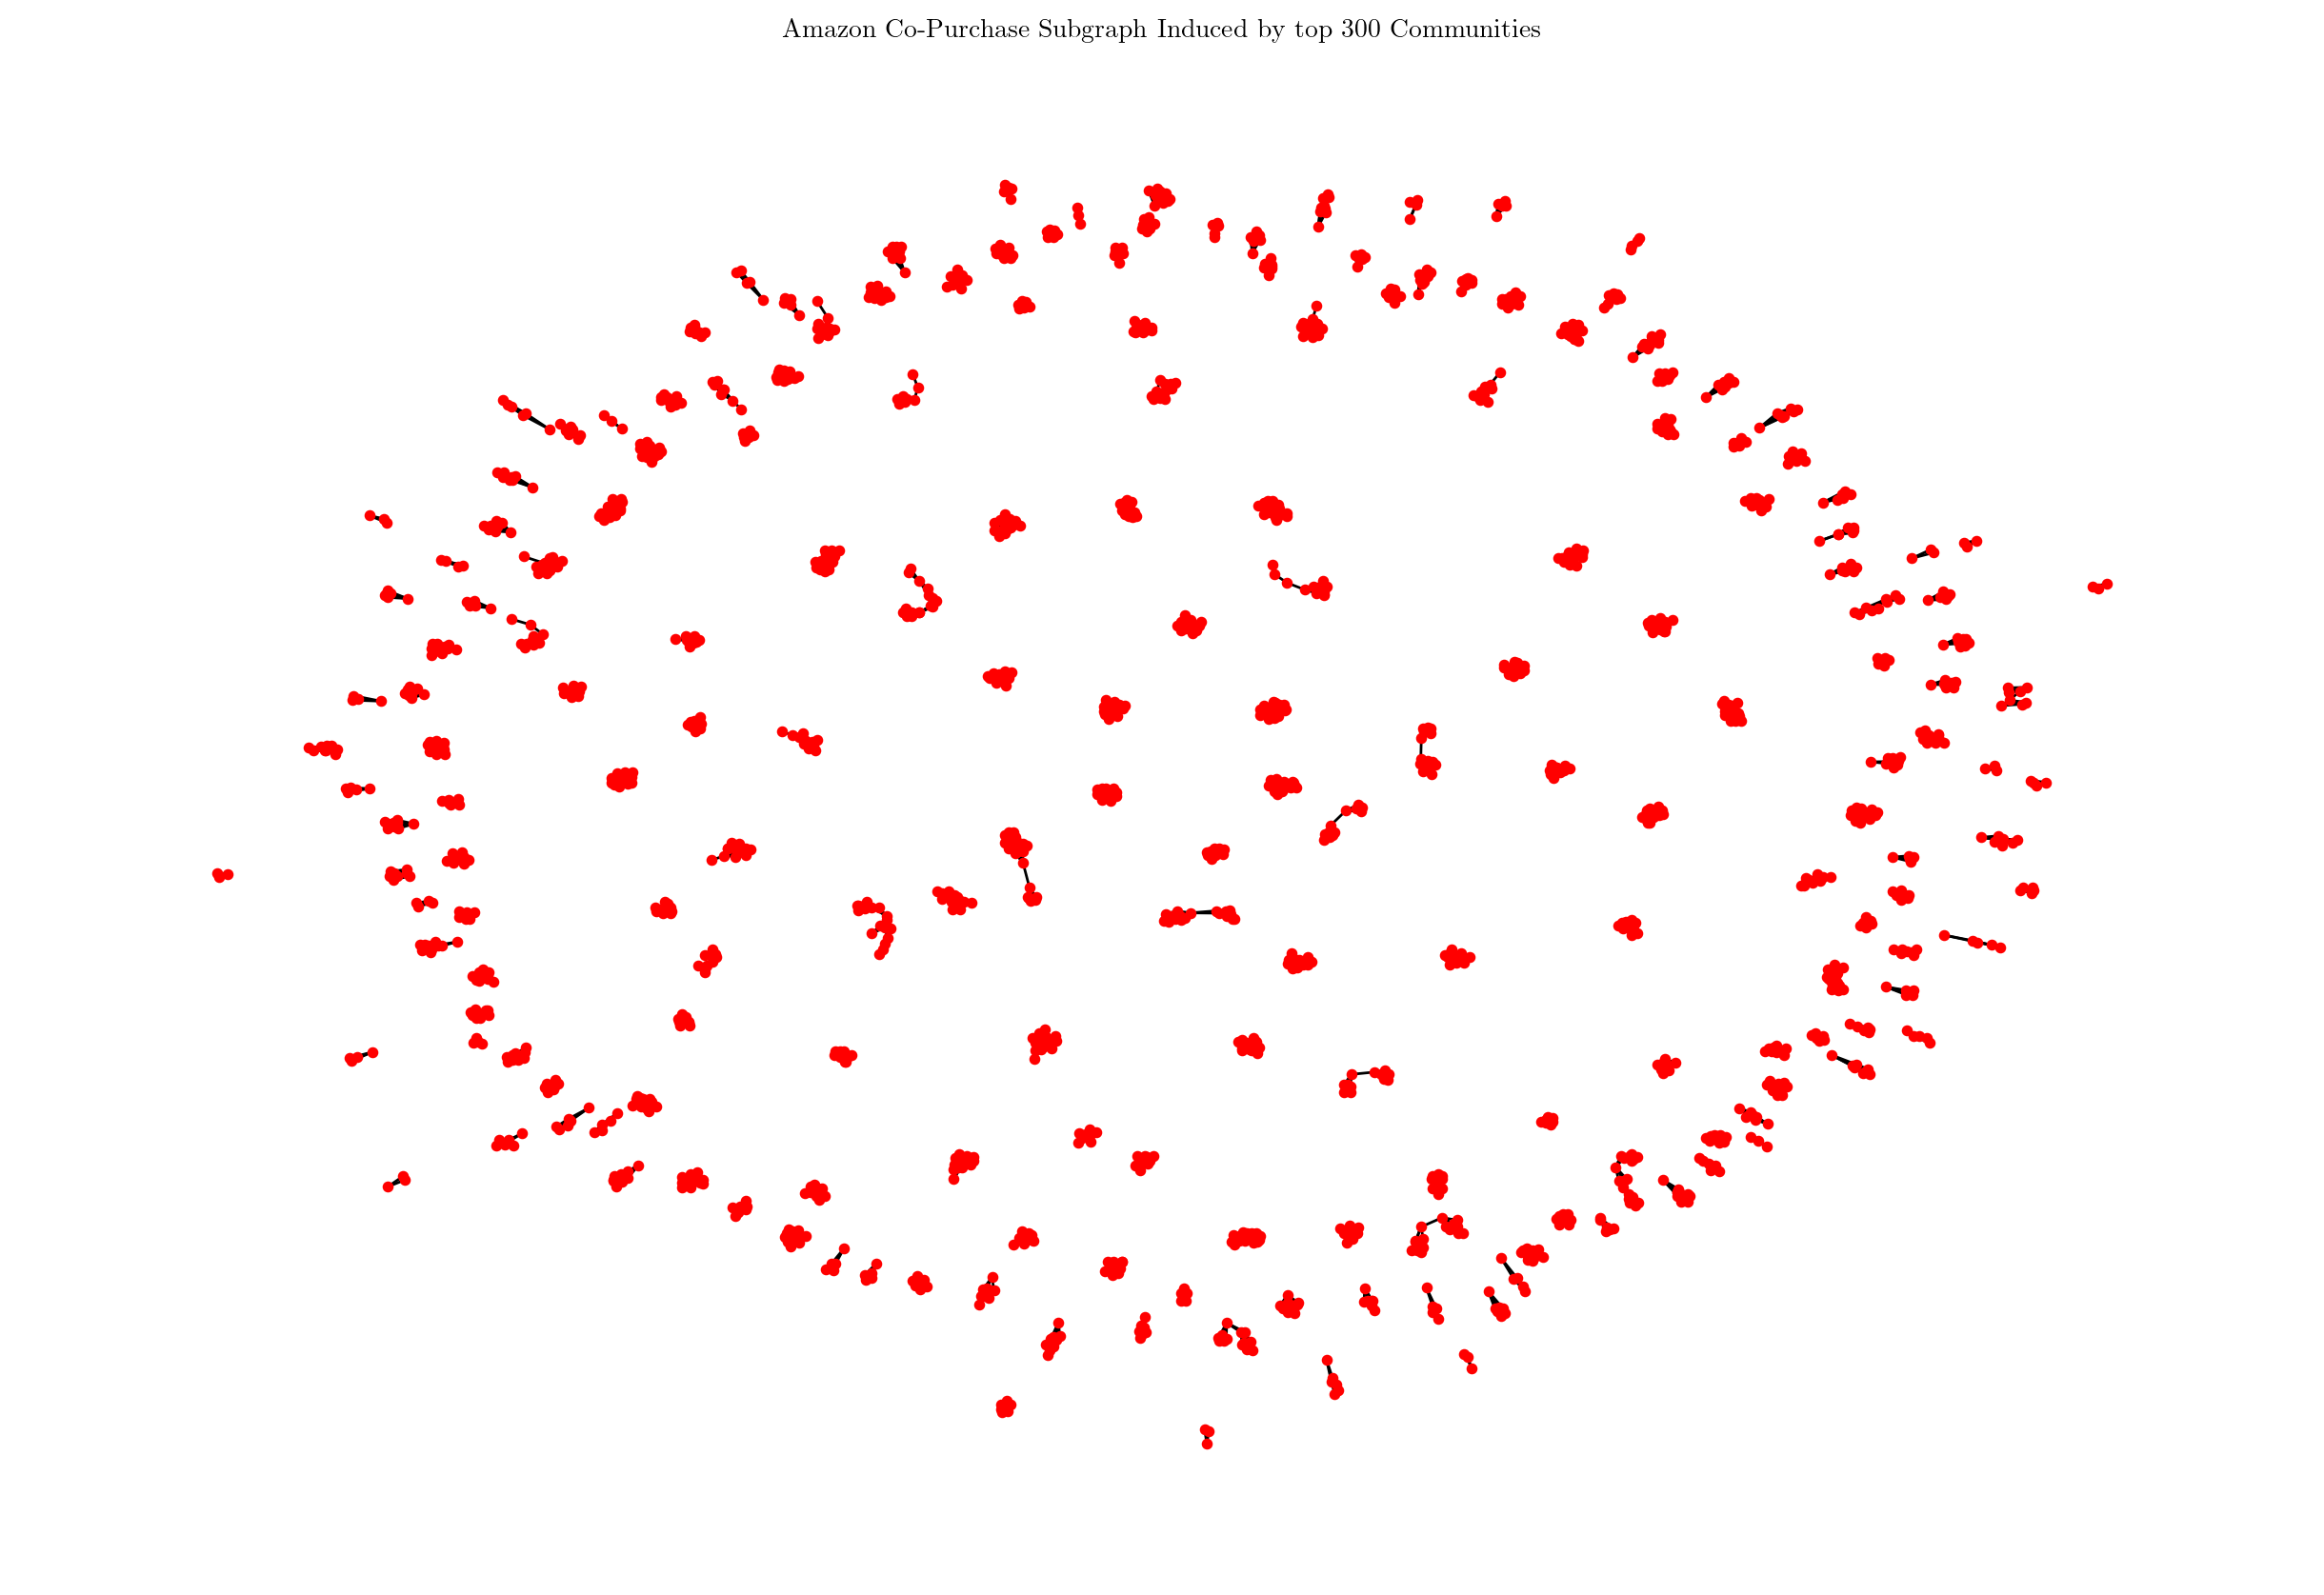

In [6]:
plt.figure(figsize = (12, 8))
nx.draw(G_ind_Amz, with_labels = False, node_size = 10, node_color = "red", edge_color = "black", pos = nx.spring_layout(G_ind_Amz, scale = 4))
plt.title("Amazon Co-Purchase Subgraph Induced by top 300 Communities")
plt.show()

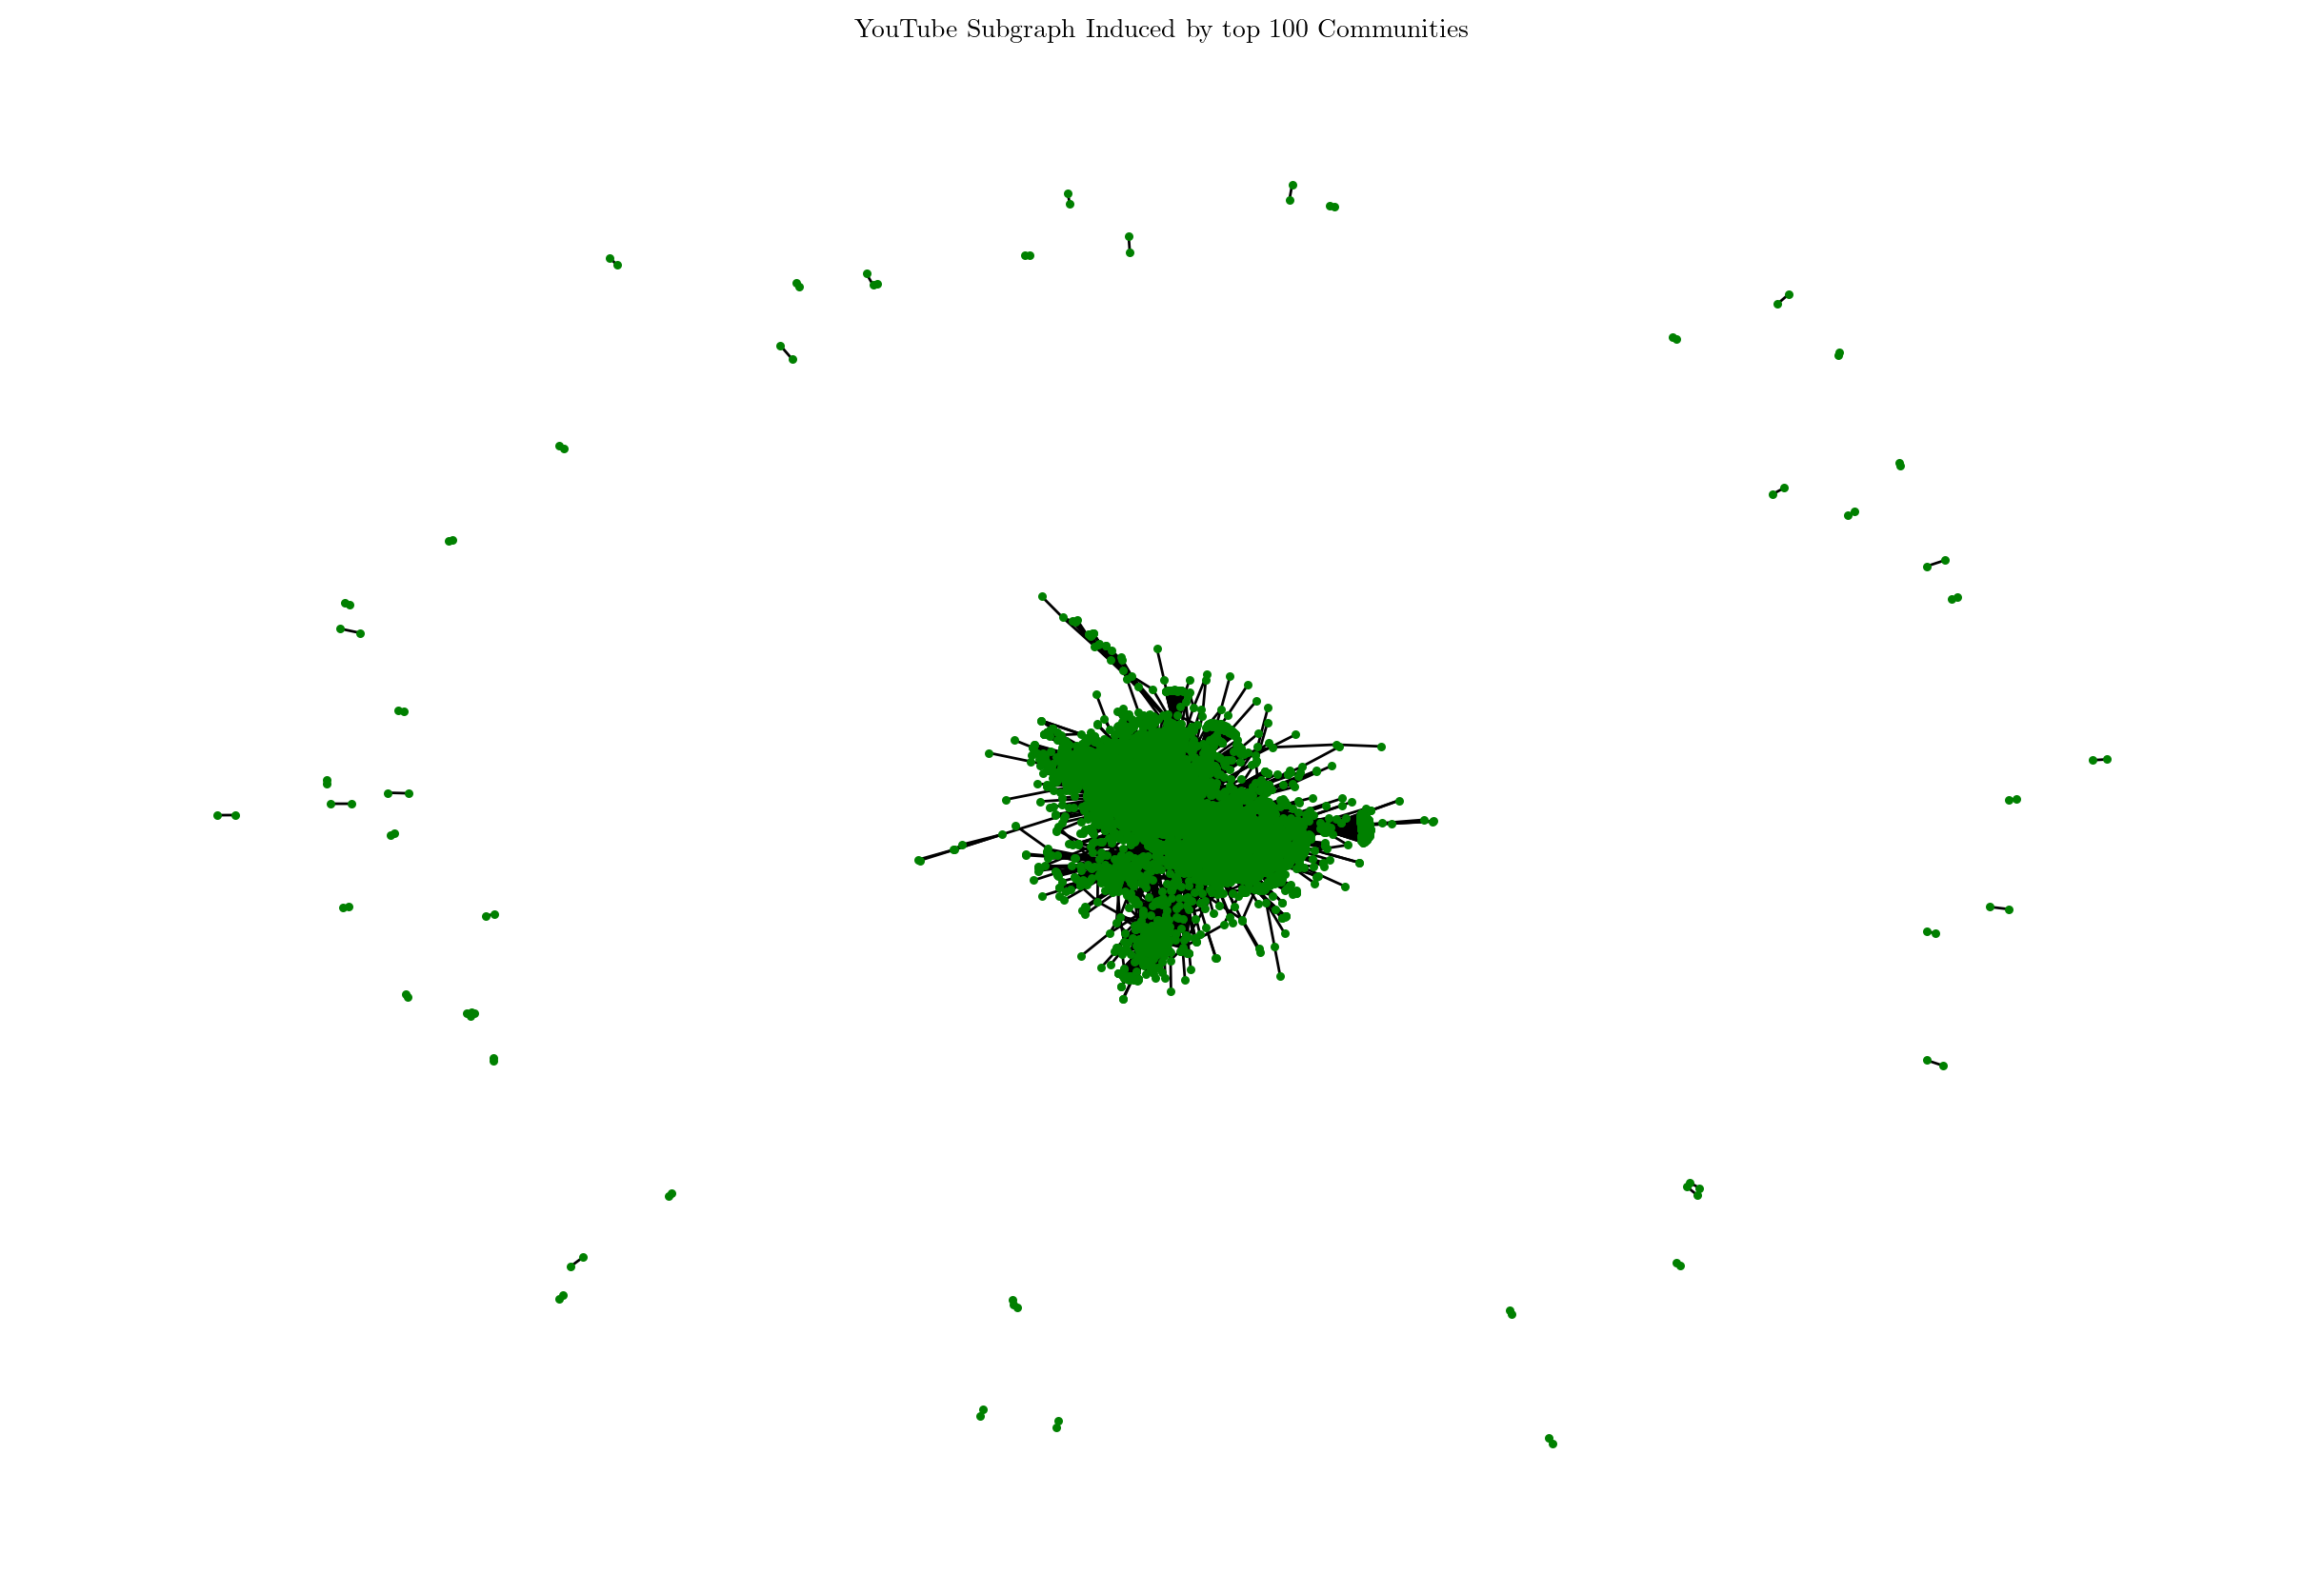

In [7]:
plt.figure(figsize = (12, 8))
nx.draw(G_ind_YT, with_labels = False, node_size = 5, node_color = "green", edge_color = "black", pos = nx.spring_layout(G_ind_YT, scale = 4))
plt.title("YouTube Subgraph Induced by top 100 Communities")
plt.show()

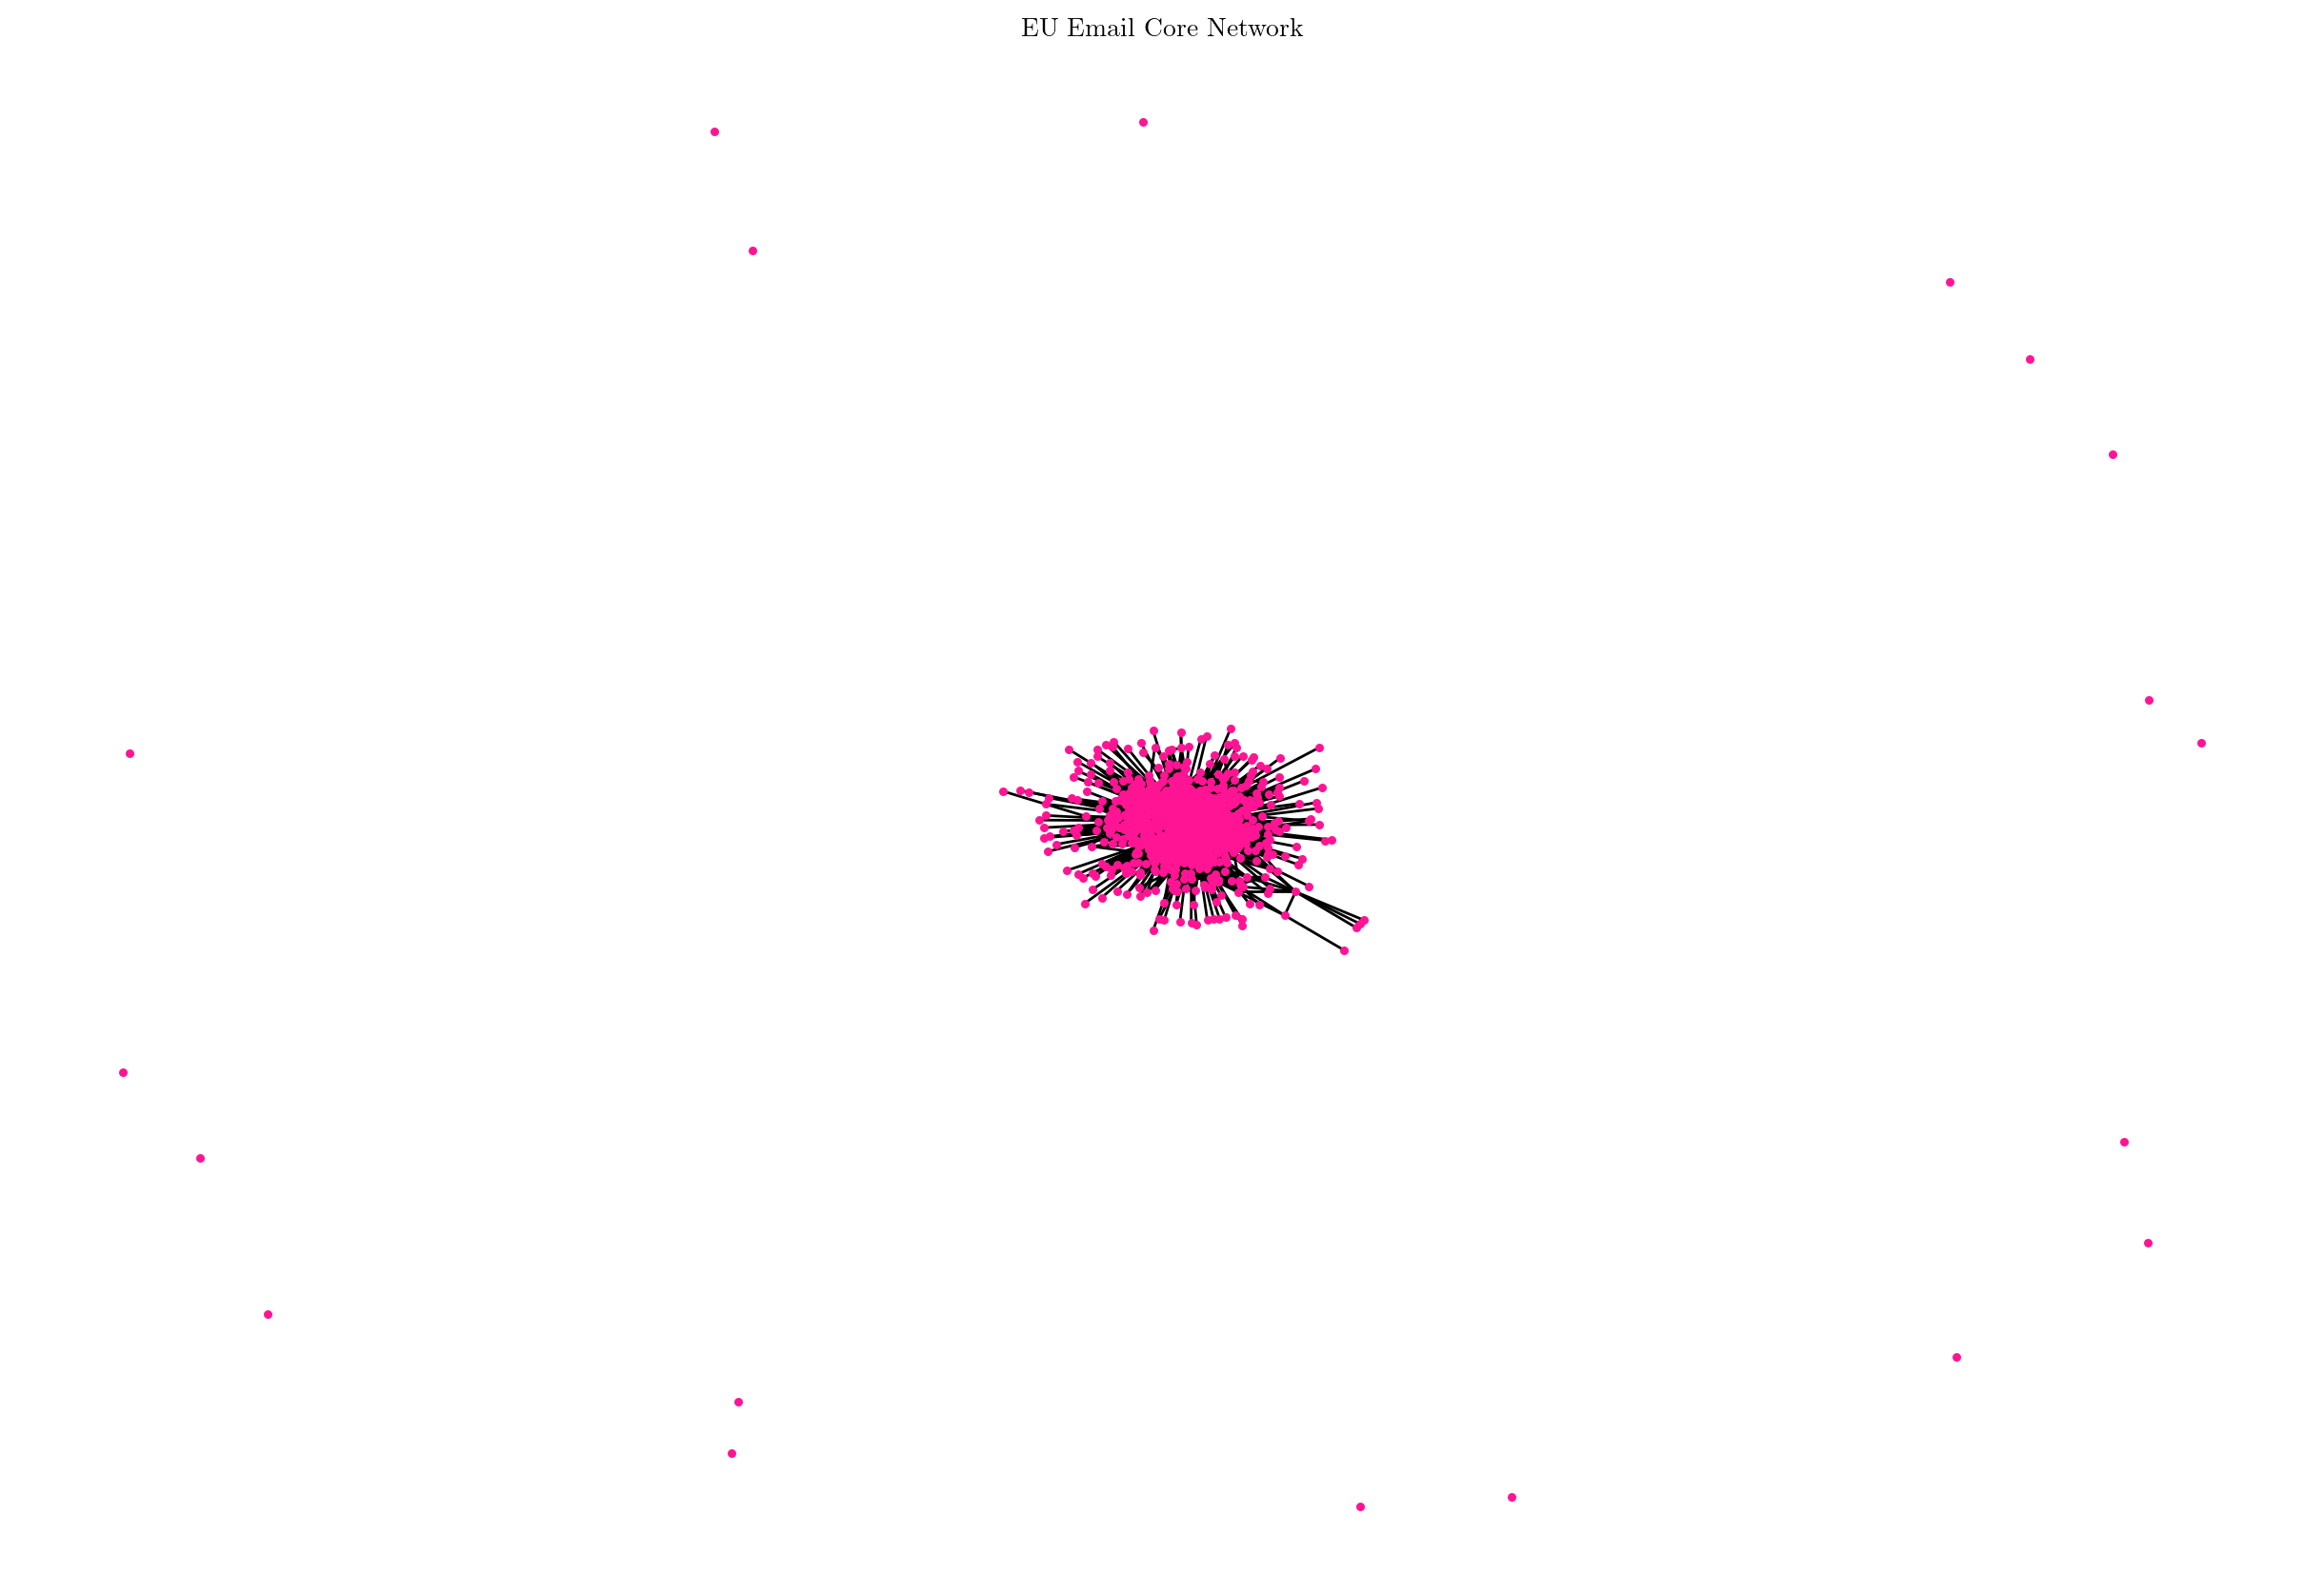

In [8]:
plt.figure(figsize = (12, 8))
nx.draw(G_eu, with_labels = False, node_size = 5, node_color = "deeppink", edge_color = "black", pos = nx.spring_layout(G_eu, scale = 4))
plt.title("EU Email Core Network")
plt.show()

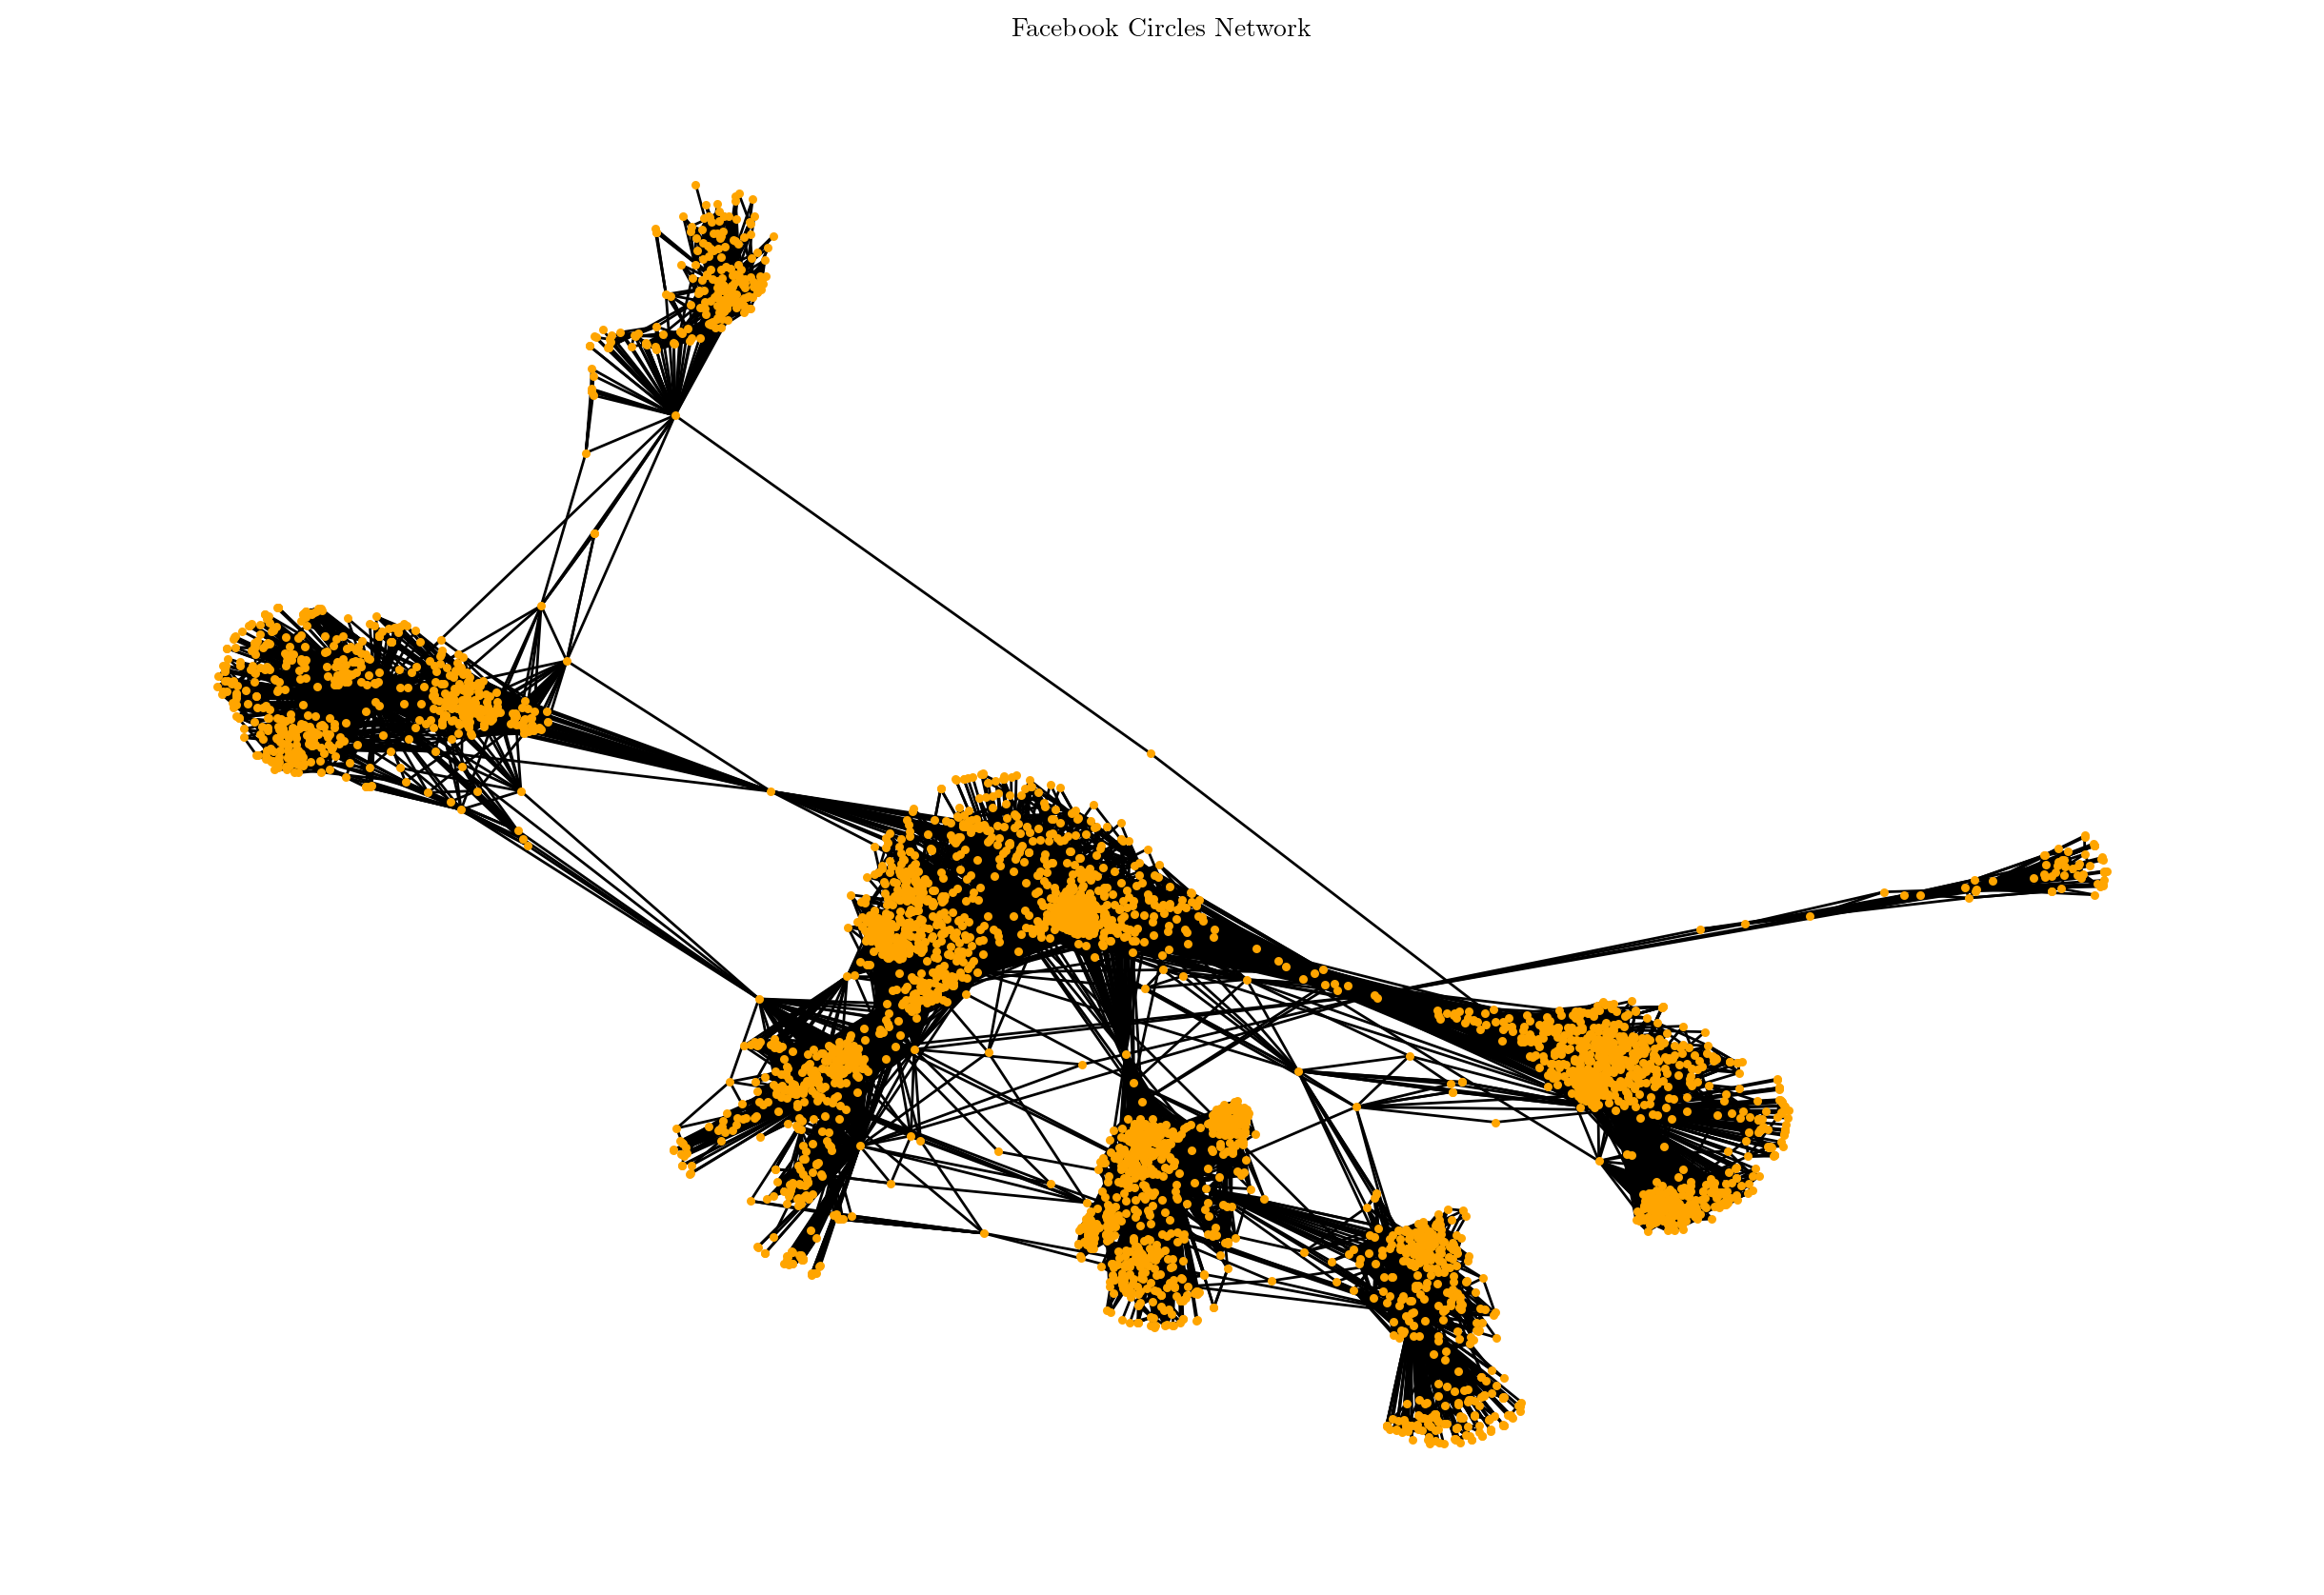

In [9]:
plt.figure(figsize = (12, 8))
nx.draw(G_FB, with_labels = False, node_size = 5, node_color = "orange", edge_color = "black", pos = nx.spring_layout(G_FB, scale = 4))
plt.title("Facebook Circles Network")
plt.show()

In [10]:
def edge_betweenness_sparsification(G, k):
    edge_betweenness = nx.edge_betweenness_centrality(G)
    edges_to_remove = sorted(edge_betweenness, key = edge_betweenness.get)[:int((1 - k) * G.number_of_edges())]
    H = G.copy()
    for edge in edges_to_remove:
        H.remove_edge(*edge)
    return H

In [11]:
def edge_random_sparsification(G, k):
    edges = list(G.edges())
    np.random.shuffle(edges)
    H = G.copy()
    for i in range(int((1 - k) * G.number_of_edges())):
        H.remove_edge(*edges[i])
    return H

In [12]:
k_values = [0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01]
sparseFunctions = [("Edge Betweenness", edge_betweenness_sparsification), ("Random", edge_random_sparsification)]

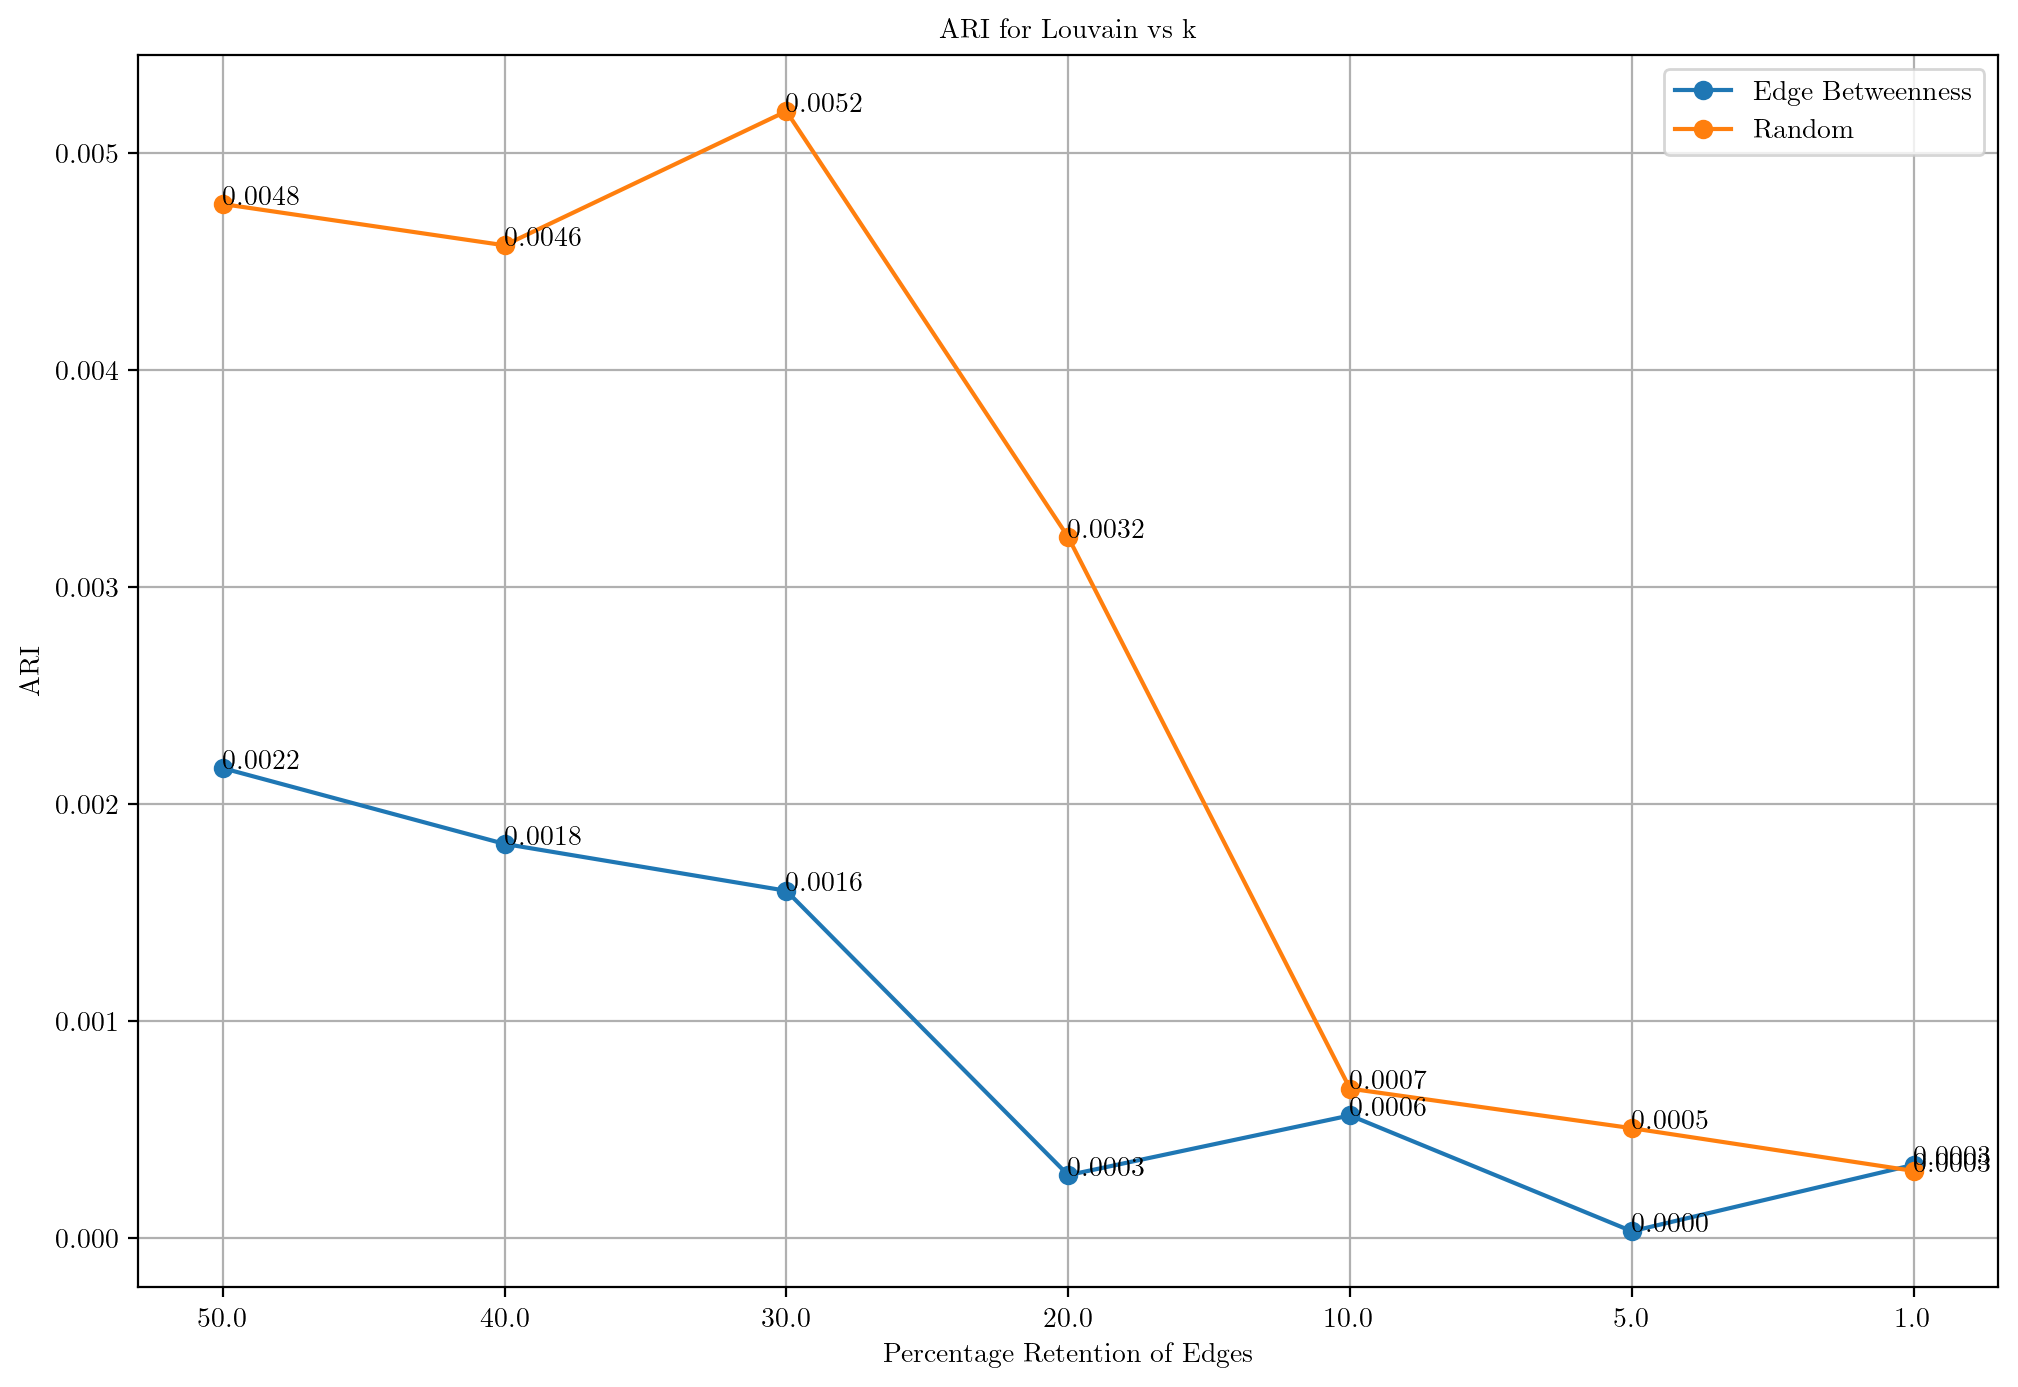

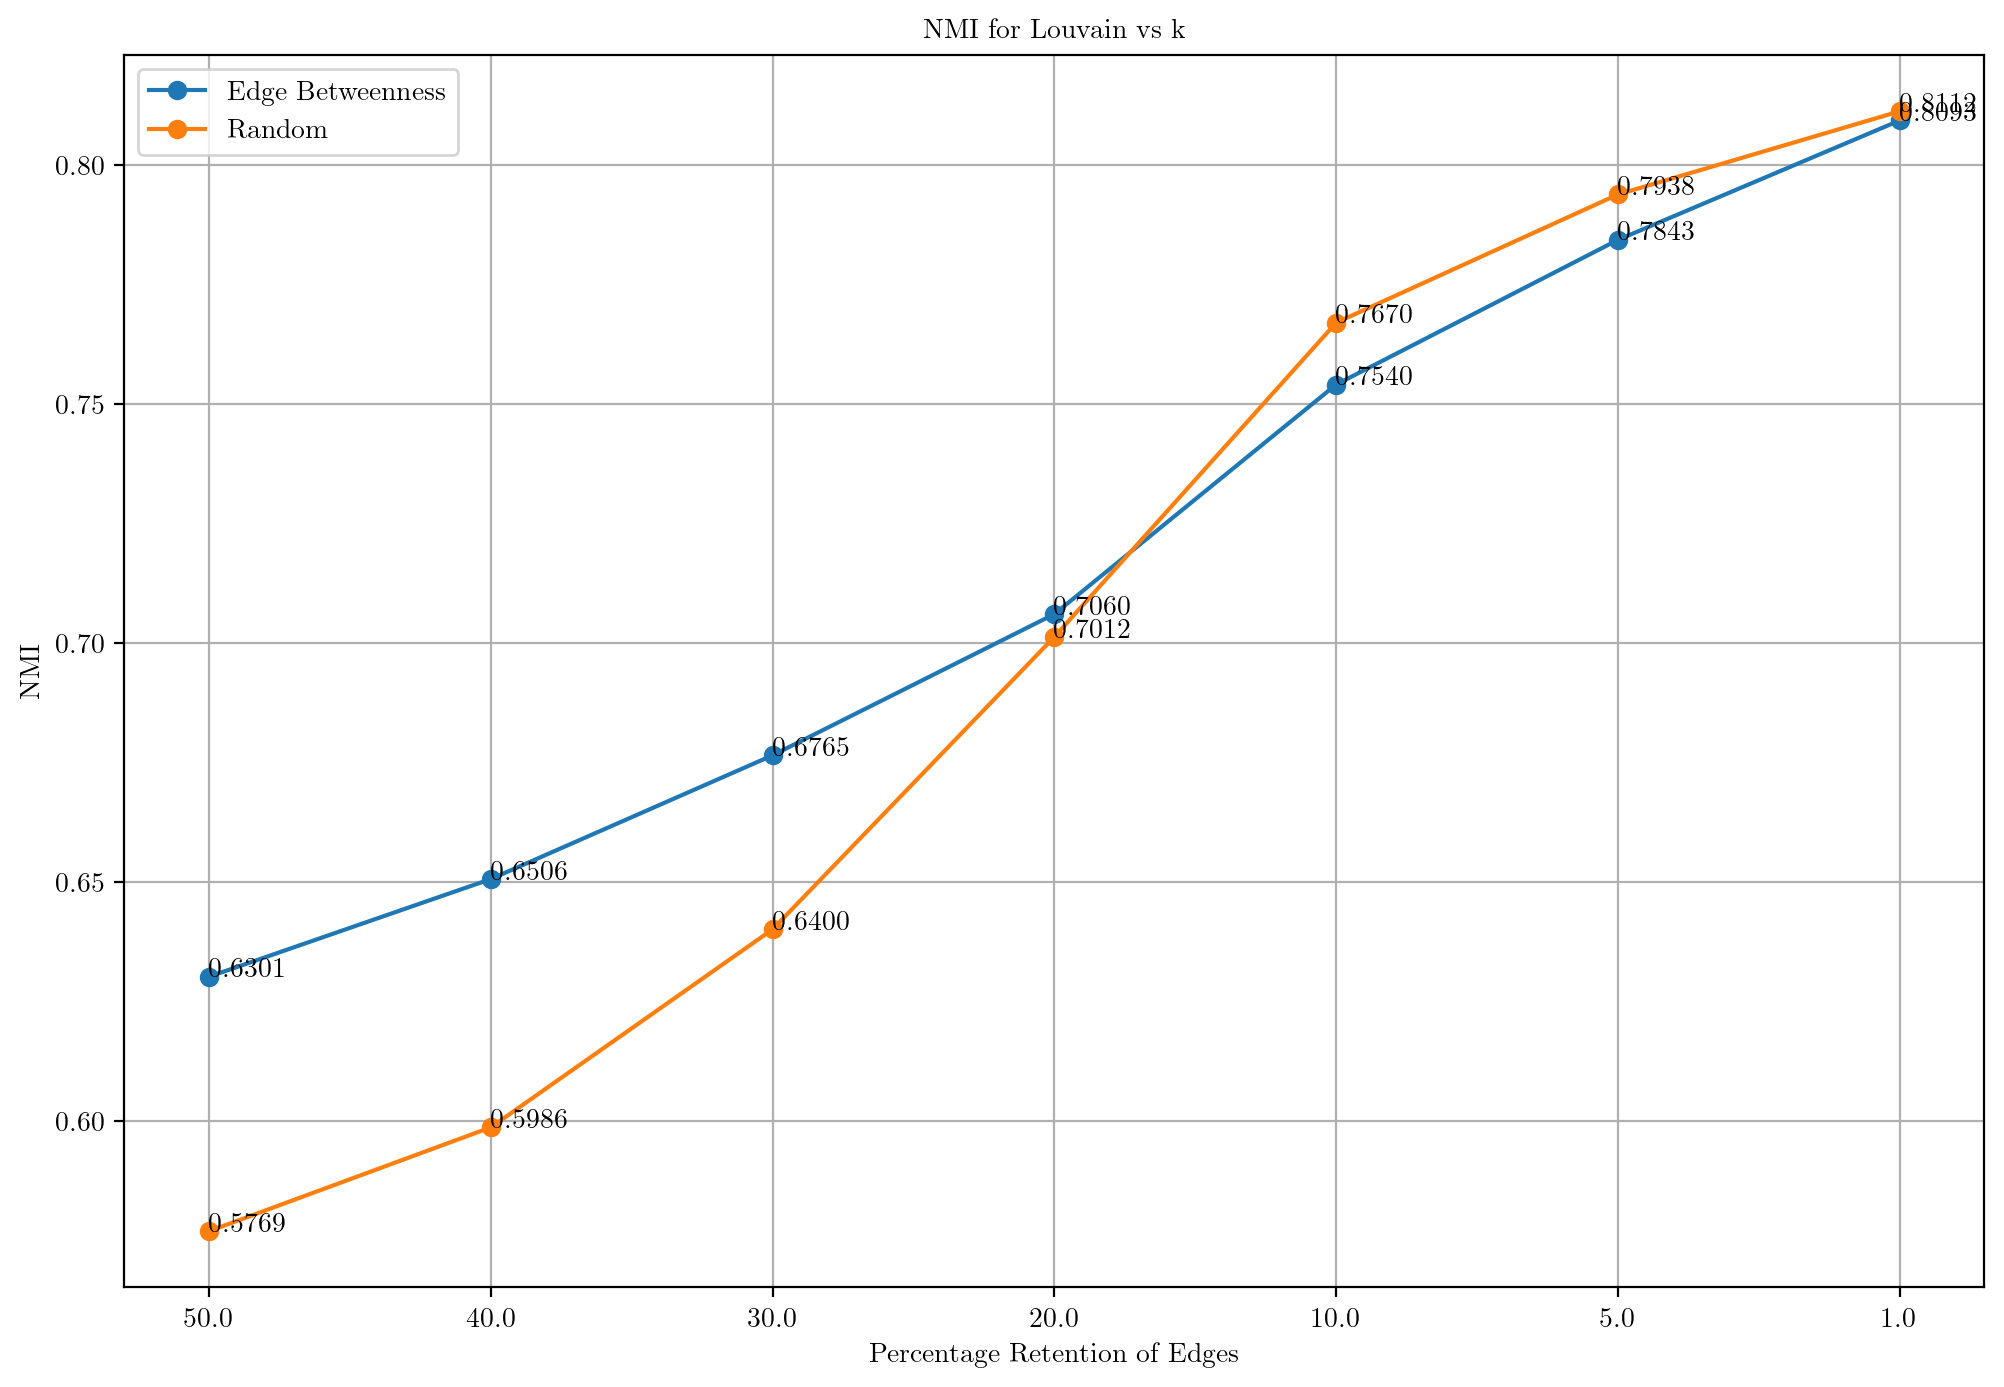

In [13]:
sparseAmzGraphs = plot_metrics_sparse(G_ind_Amz, get_community_dict(list(communitiesAmazon.values())), sparseFunctions, k_values)

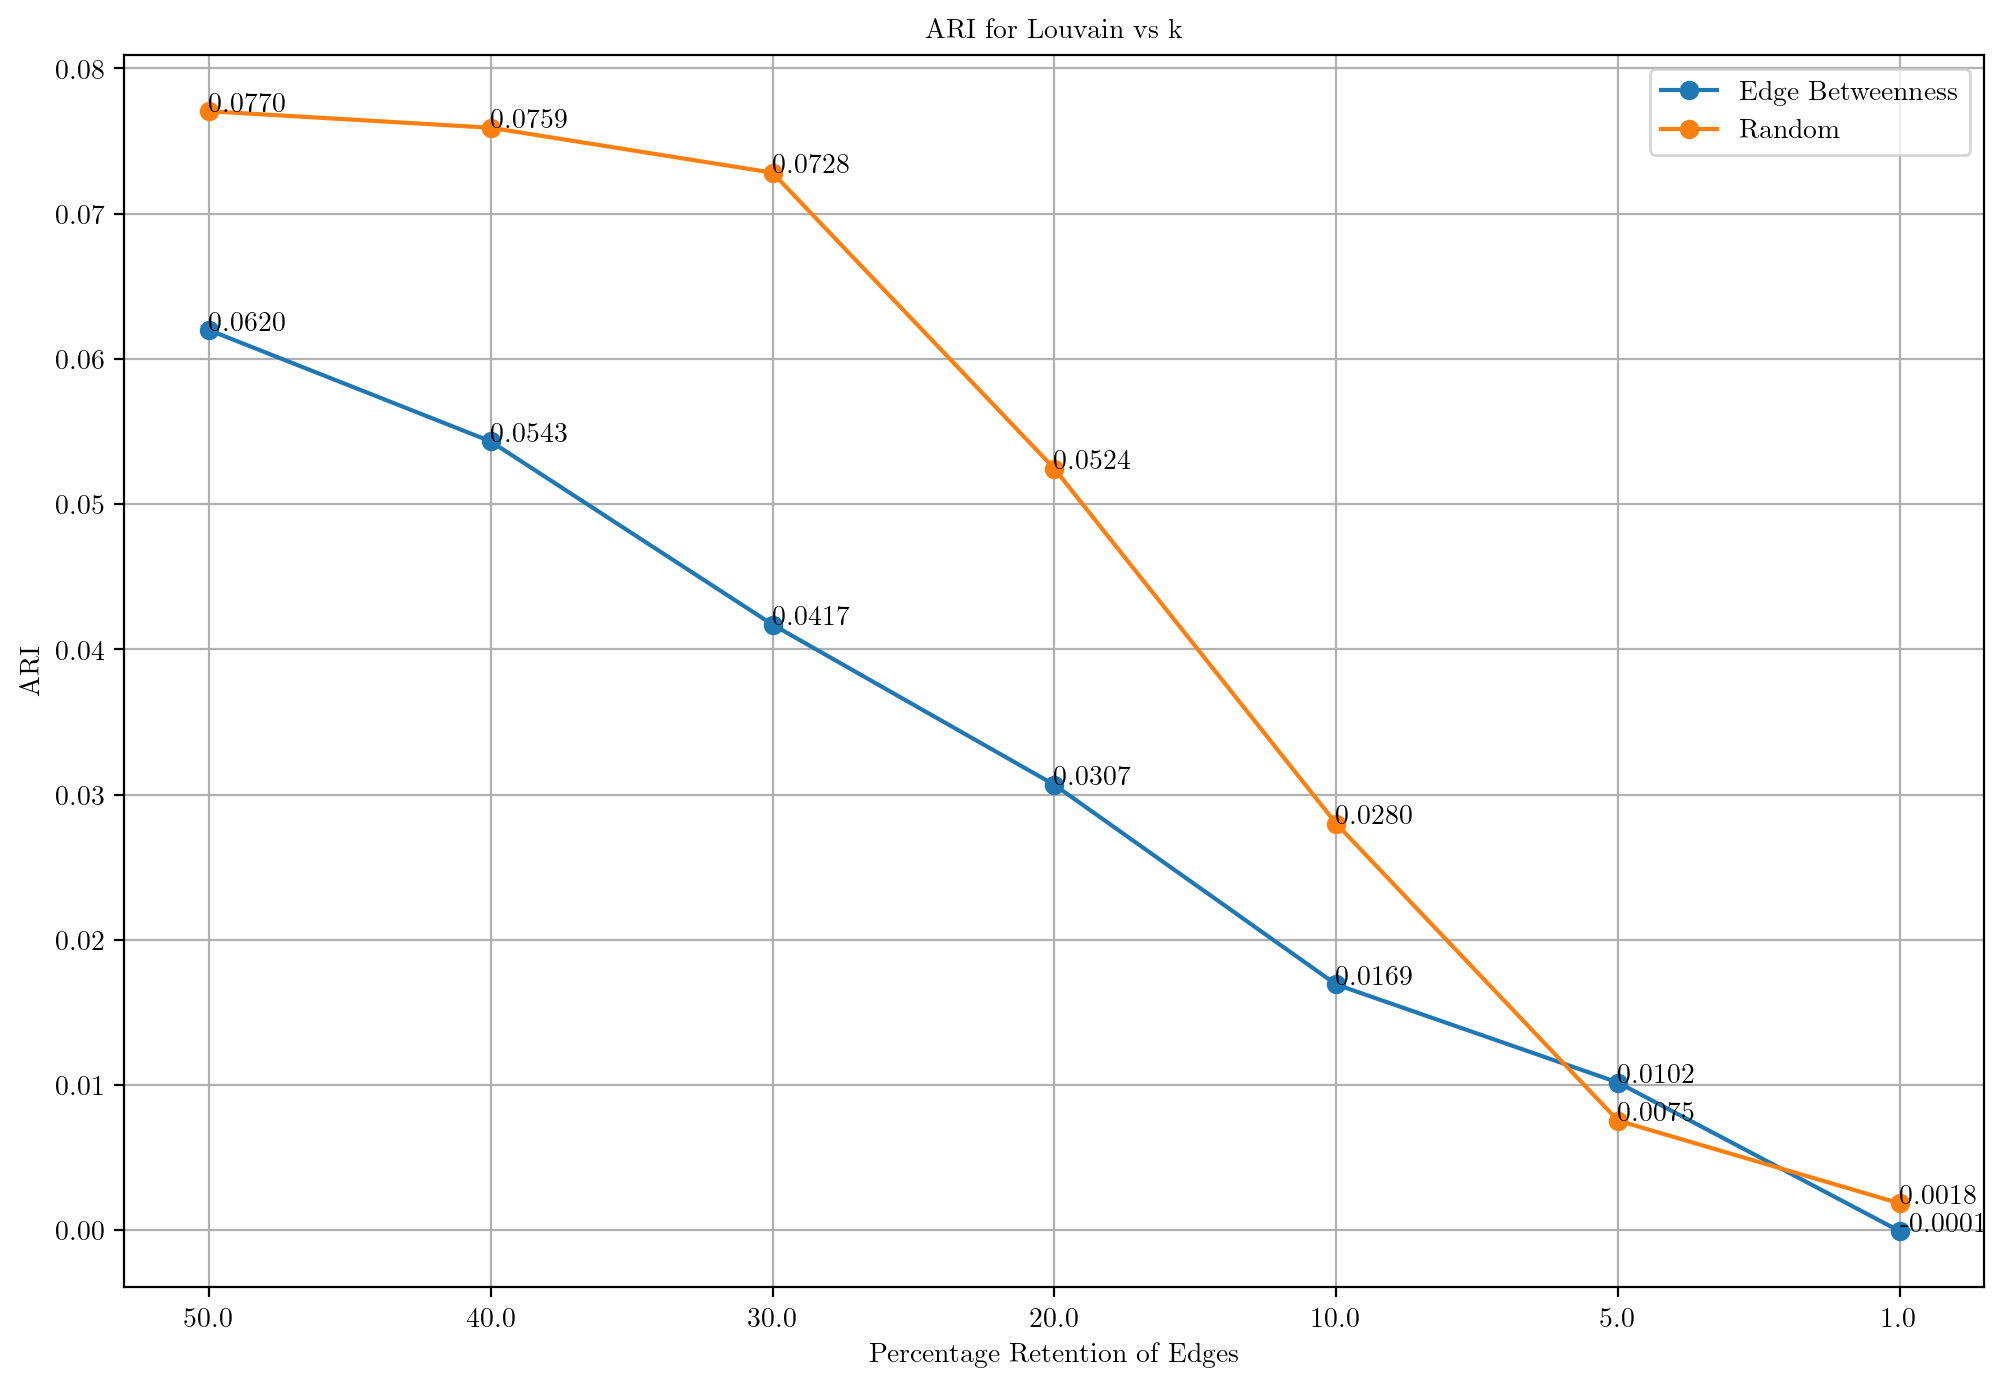

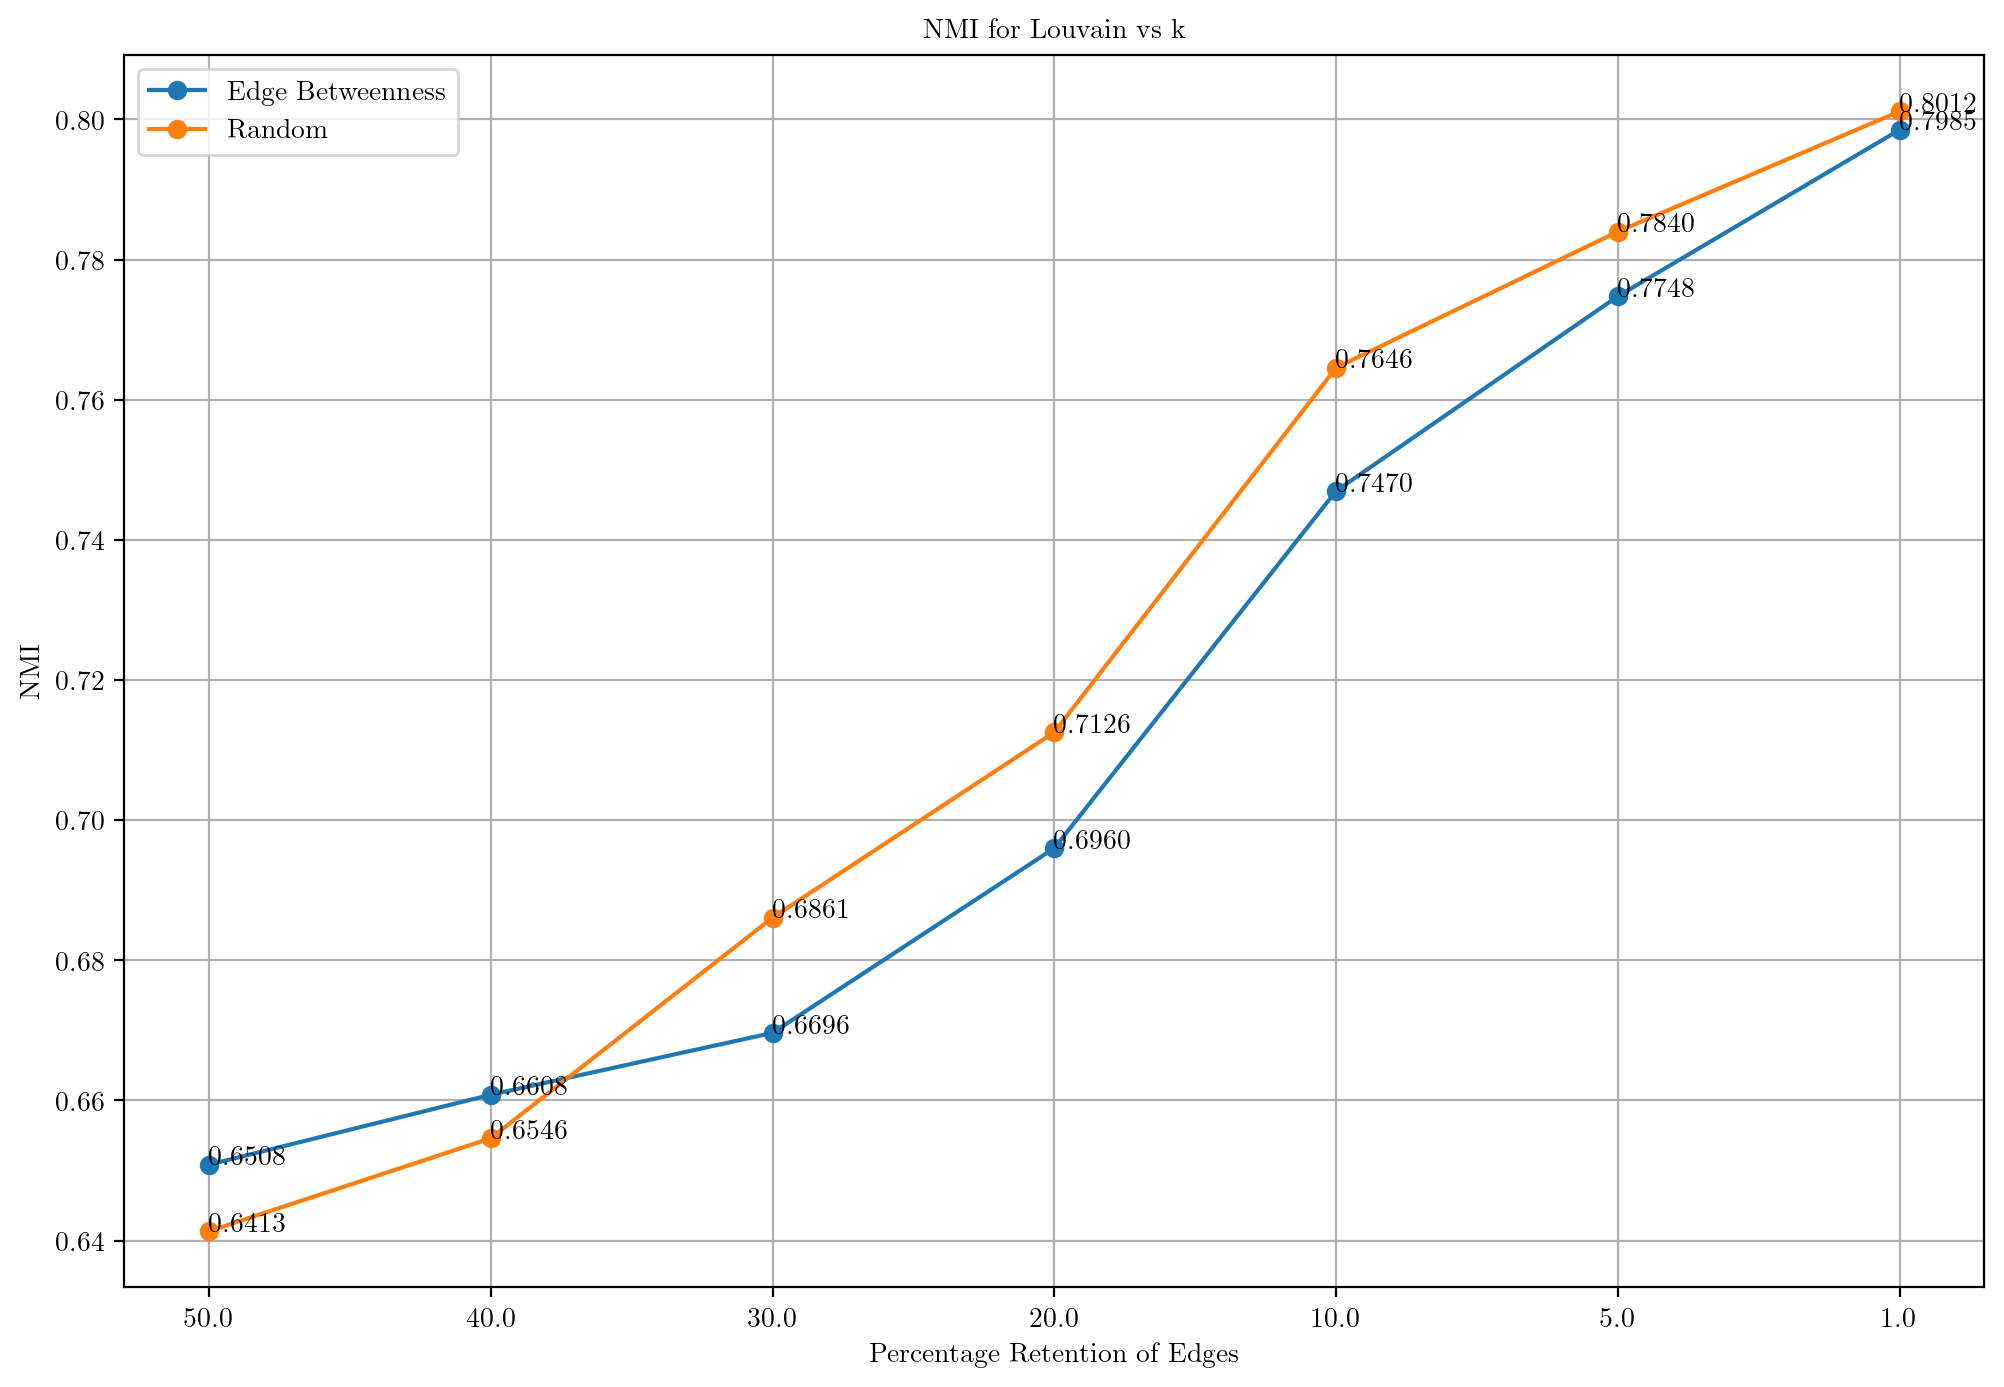

In [14]:
sparseDBLPGraphs = plot_metrics_sparse(G_ind_DBLP, get_community_dict(list(communitiesDBLP.values())), sparseFunctions, k_values)